# Кластерный анализ

**Задача:** создать программу, которая бы проводила кластерный анализ для плоских данных.

**Выполнила:** Антропова Ольга.

### Описание идеи

Процесс класстеризации относится больше к сфере машинного обучения без учителя, для которой характерен ряд сложностей. Например, популярный способ кластеризации методом k-means имеет ряд недостатков: для его работы необходимо заранее знать количество наших классов.

При кластеризации методом k-means количество кластеров обычно определяется с помощью "метода локтя", где мы многократно прогоняем работу алгоритма, постепенно увеличивая количество выбираемых кластеров. На основе полученных данных строится график, где Ох - количество кластеров, а Оу - оценка кластеризации. Такой метод позволяет определить оптимальное количество классов для решения нашей задачи, однако с помощью графика на глаз не всегда получается выбрать подходящий вариант.

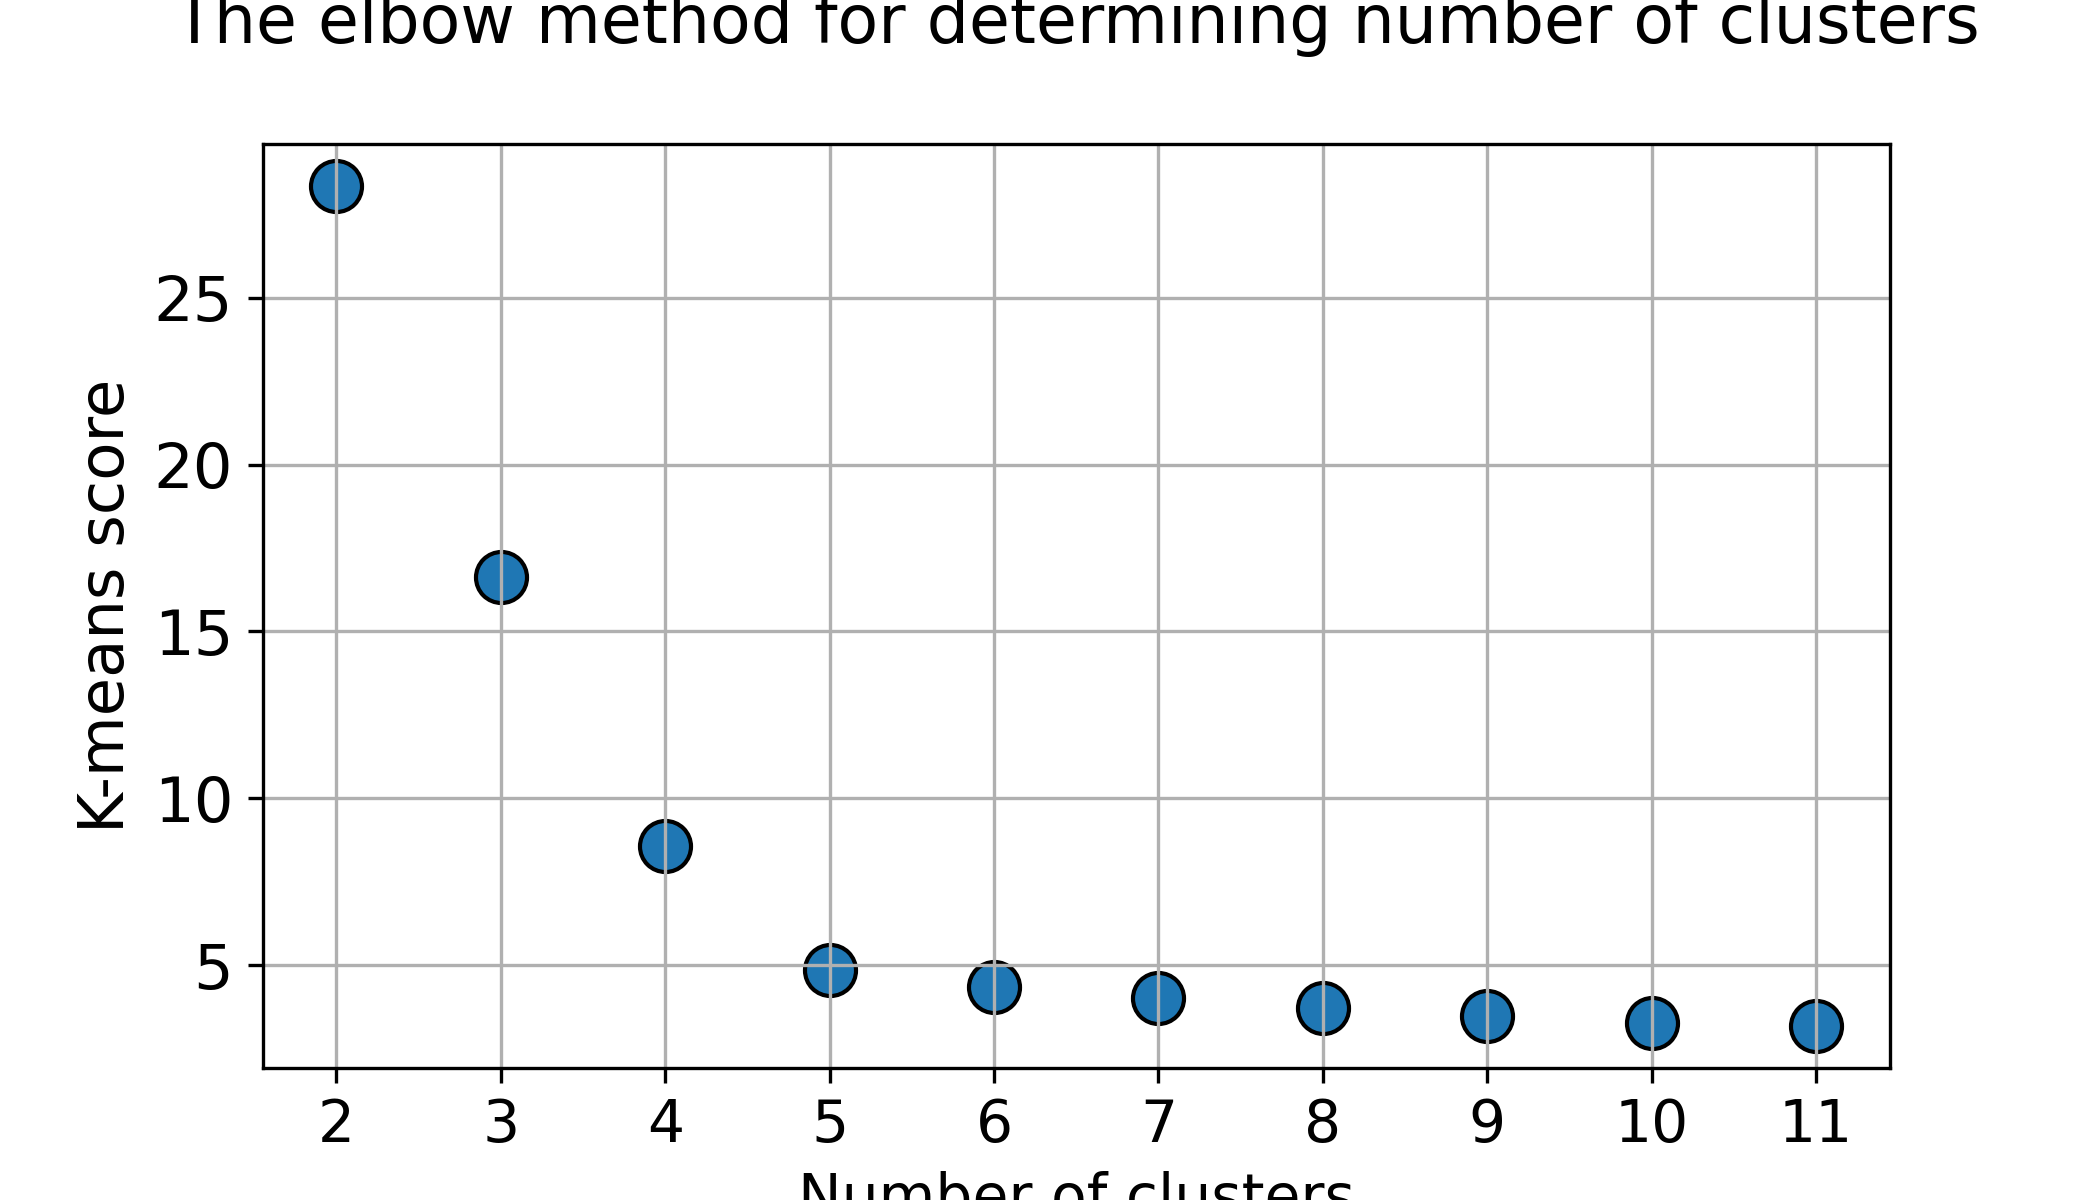

Не совсем понятно, какое количество классов следует выбирать: 4 или 5. 

Исходя из этого, интересно проверить другие метрики, которые помогут определить нужное количество кластеров для наших данных.

### Сравнение метрик

**Используемые библиотеки:**
- numpy
- pandas
- matplotlib
- seaborn
- sklearn (preprocessing, datasets, metrics, cluster)

### Генерация данных

Изначально нужно сгенерировать плоские данные, на которых мы будем обучать модель.

Изначальные параметры:
- n_features = 4 (количество параметров, измерений)
- n_cluster = 5 (количество создаваемых кластеров)
- cluster_std = 1.2 (значение стандартного отклонения для генерации точек каждого кластера)
- n_samples = 200 (общий размер выборки на все кластеры)

Генерируем данные с помощью библиотеки `sklearn` и функции `make_blobs`, на выходе которой получаем 2 списка: один со значениями параметров для каждой точки, а второй для метки класса.

```
data1 = make_blobs(n_samples=n_samples,
                 n_features=n_features,
                 centers=n_cluster,
                 cluster_std=cluster_std)
```
Далее преобразовываем наши списки в датасет, чтобы более удобно обращаться к данным. 


### Сравнение метрик

Будем проводить анализ нескольких метрик помимо стандартной метрики для определения подходящего значения кластеров.

**Значение силуэта** показывает, насколько объект похож на свой кластер по сравнению с другими кластерами. Формула для расчета значения силуэта:

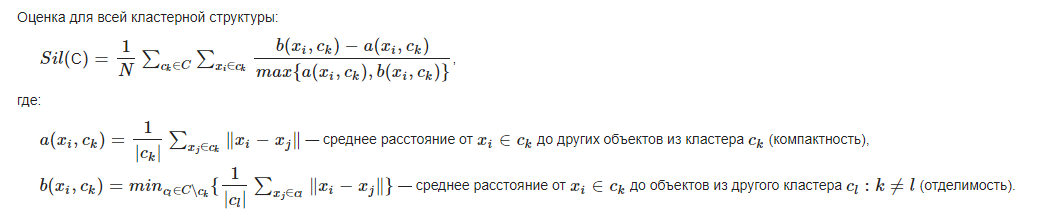

**Индекс Дэвиса-Болдуина** - одна из самых используемых мер оценки качества кластеризации. Она вычисляет компактность как расстояние от объектов кластера до центроидов, а отделимость - как расстояние между центроидами по следующей формуле:

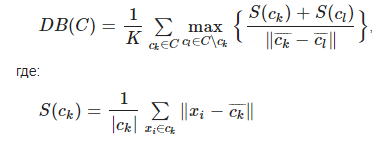

Прогоняем несколько раз обучение модели `k-means`, увеличивая на каждой итерации количество классов (от 2 до 11), и выводим значения наших метрик. На основе полученных данных строим графики зависимости значения каждой метрики от количества кластеров.

Выбираем наибольшее значение из полученных в ходе расчета значения силуета, сооветствующее ему количество классов и будет оптимальным. Обучаем на его основе уже основную модель k-means, предсказываем классы для каждой точки и строим графики. Получаем график с фактическими значениями классов (по первым двум параметрам на осях), которые мы генерировали в самом начале эксперимента:

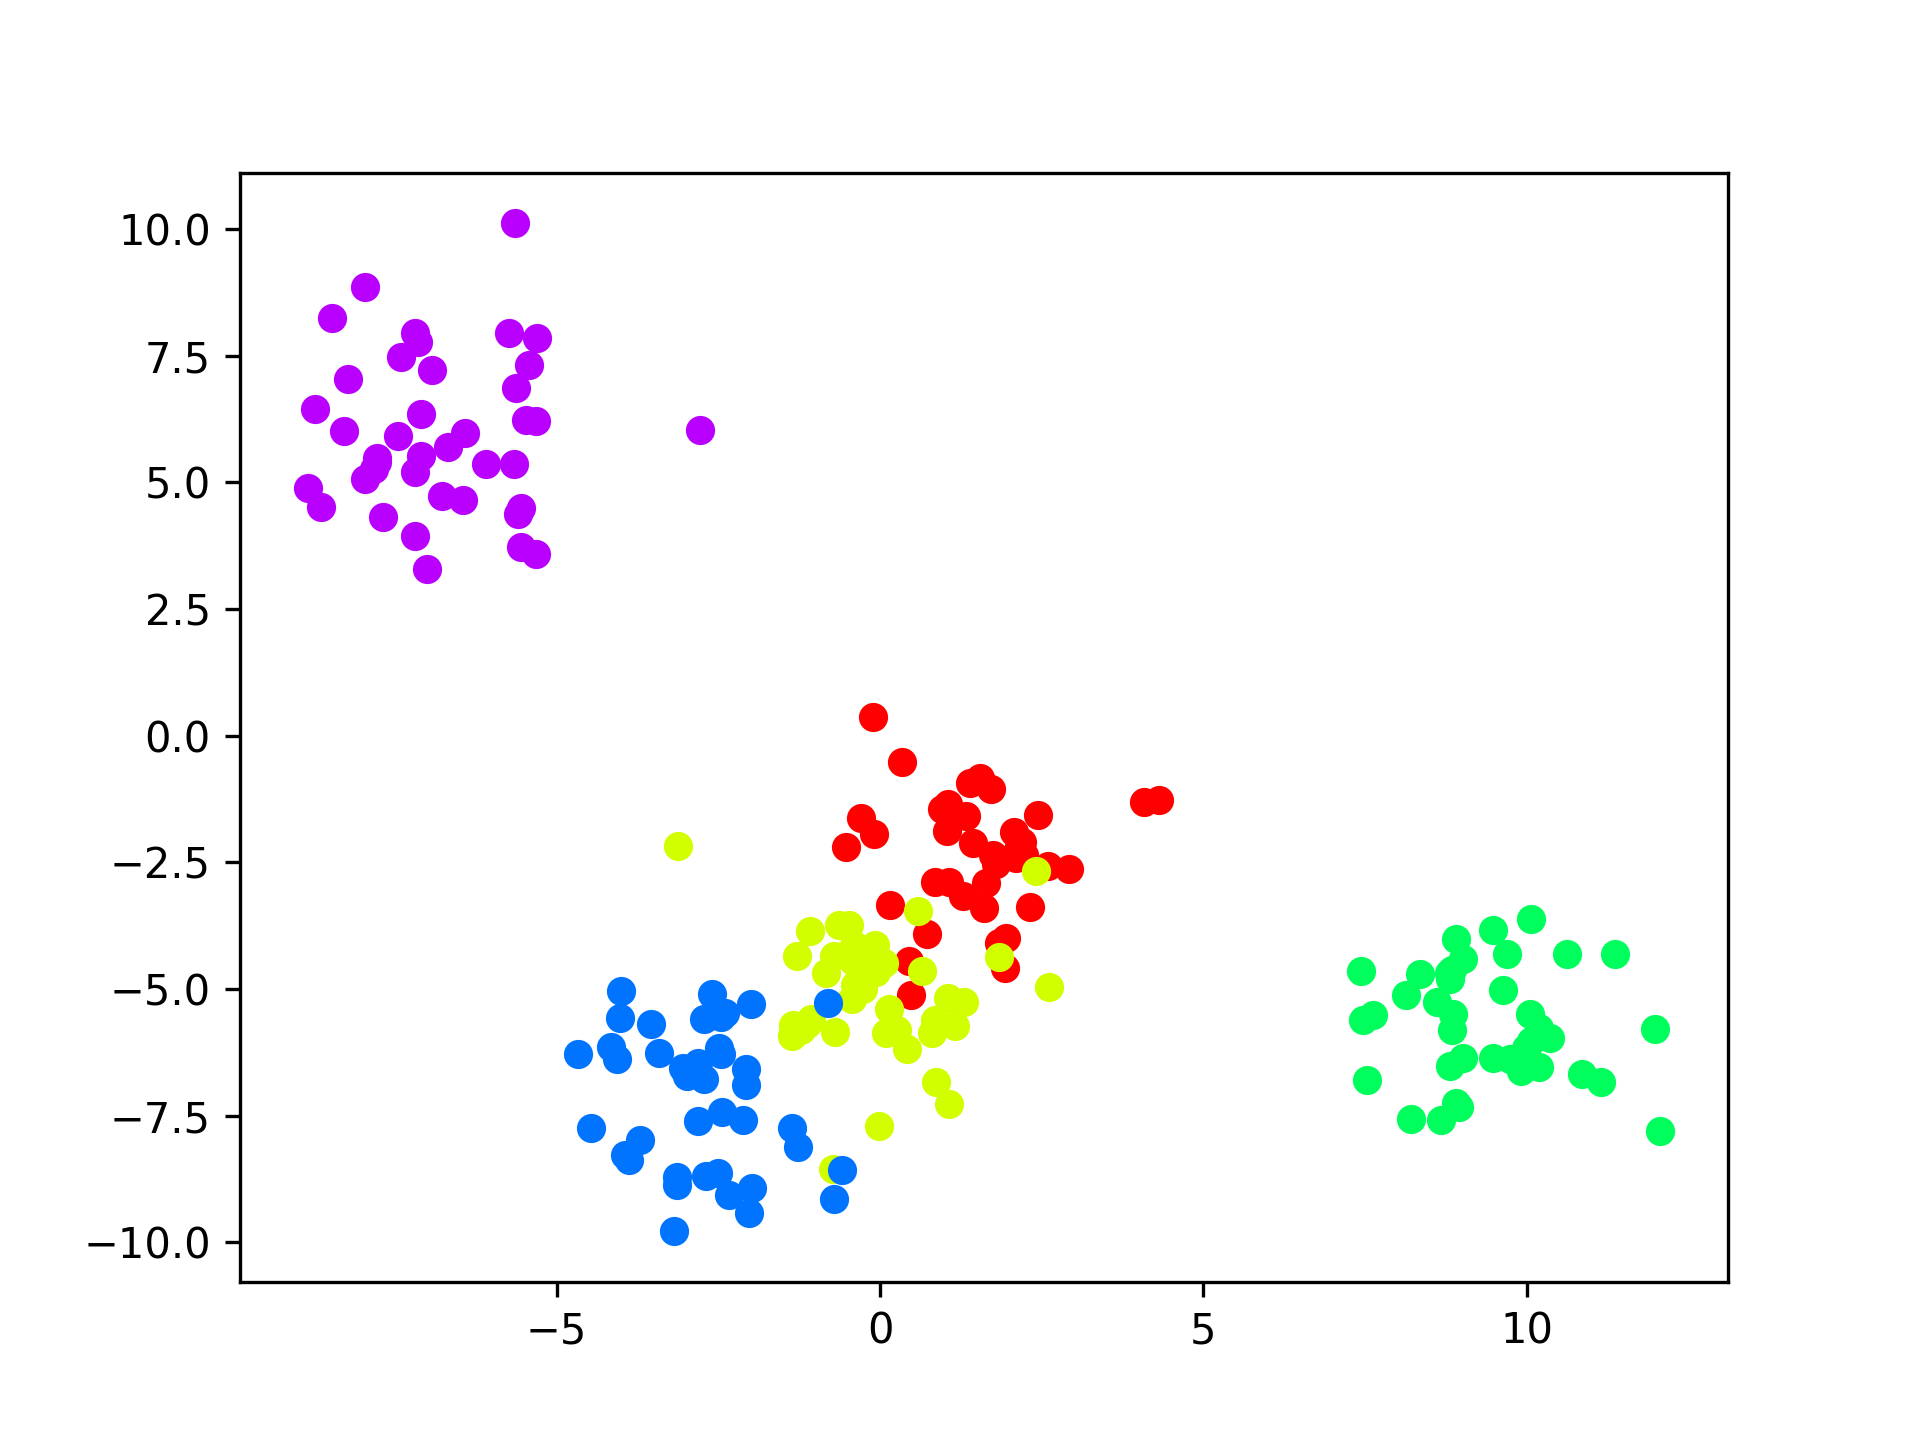

И график с предсказанными моделью значениями классов для каждой точки:

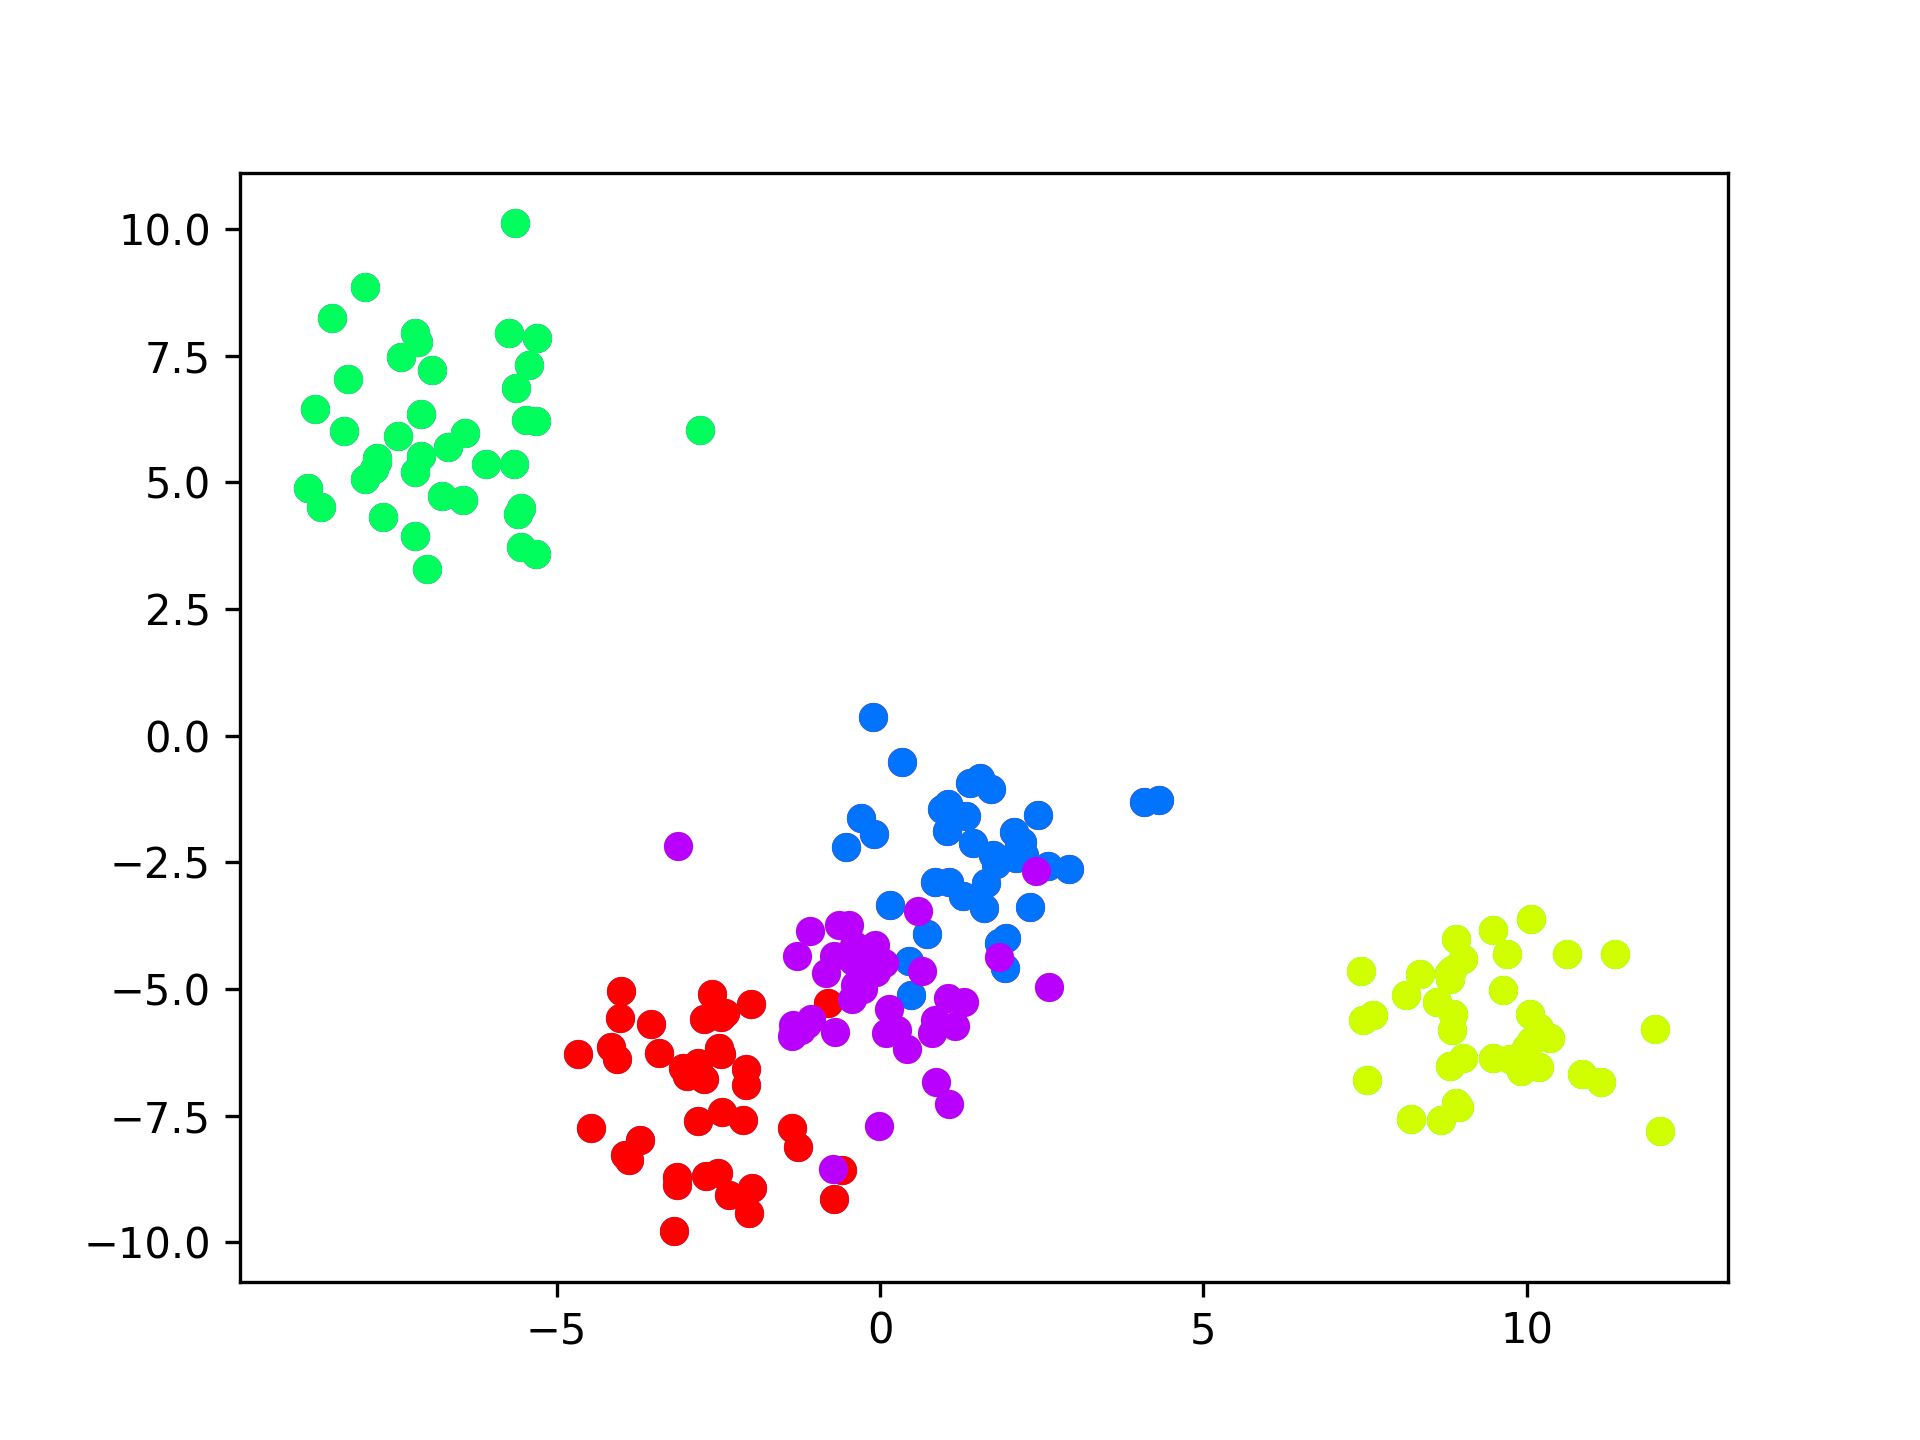

Как видим, модель с допустимой точностью разделяе на кластеры наши данные.

### Выводы

Получаем следующие графики:

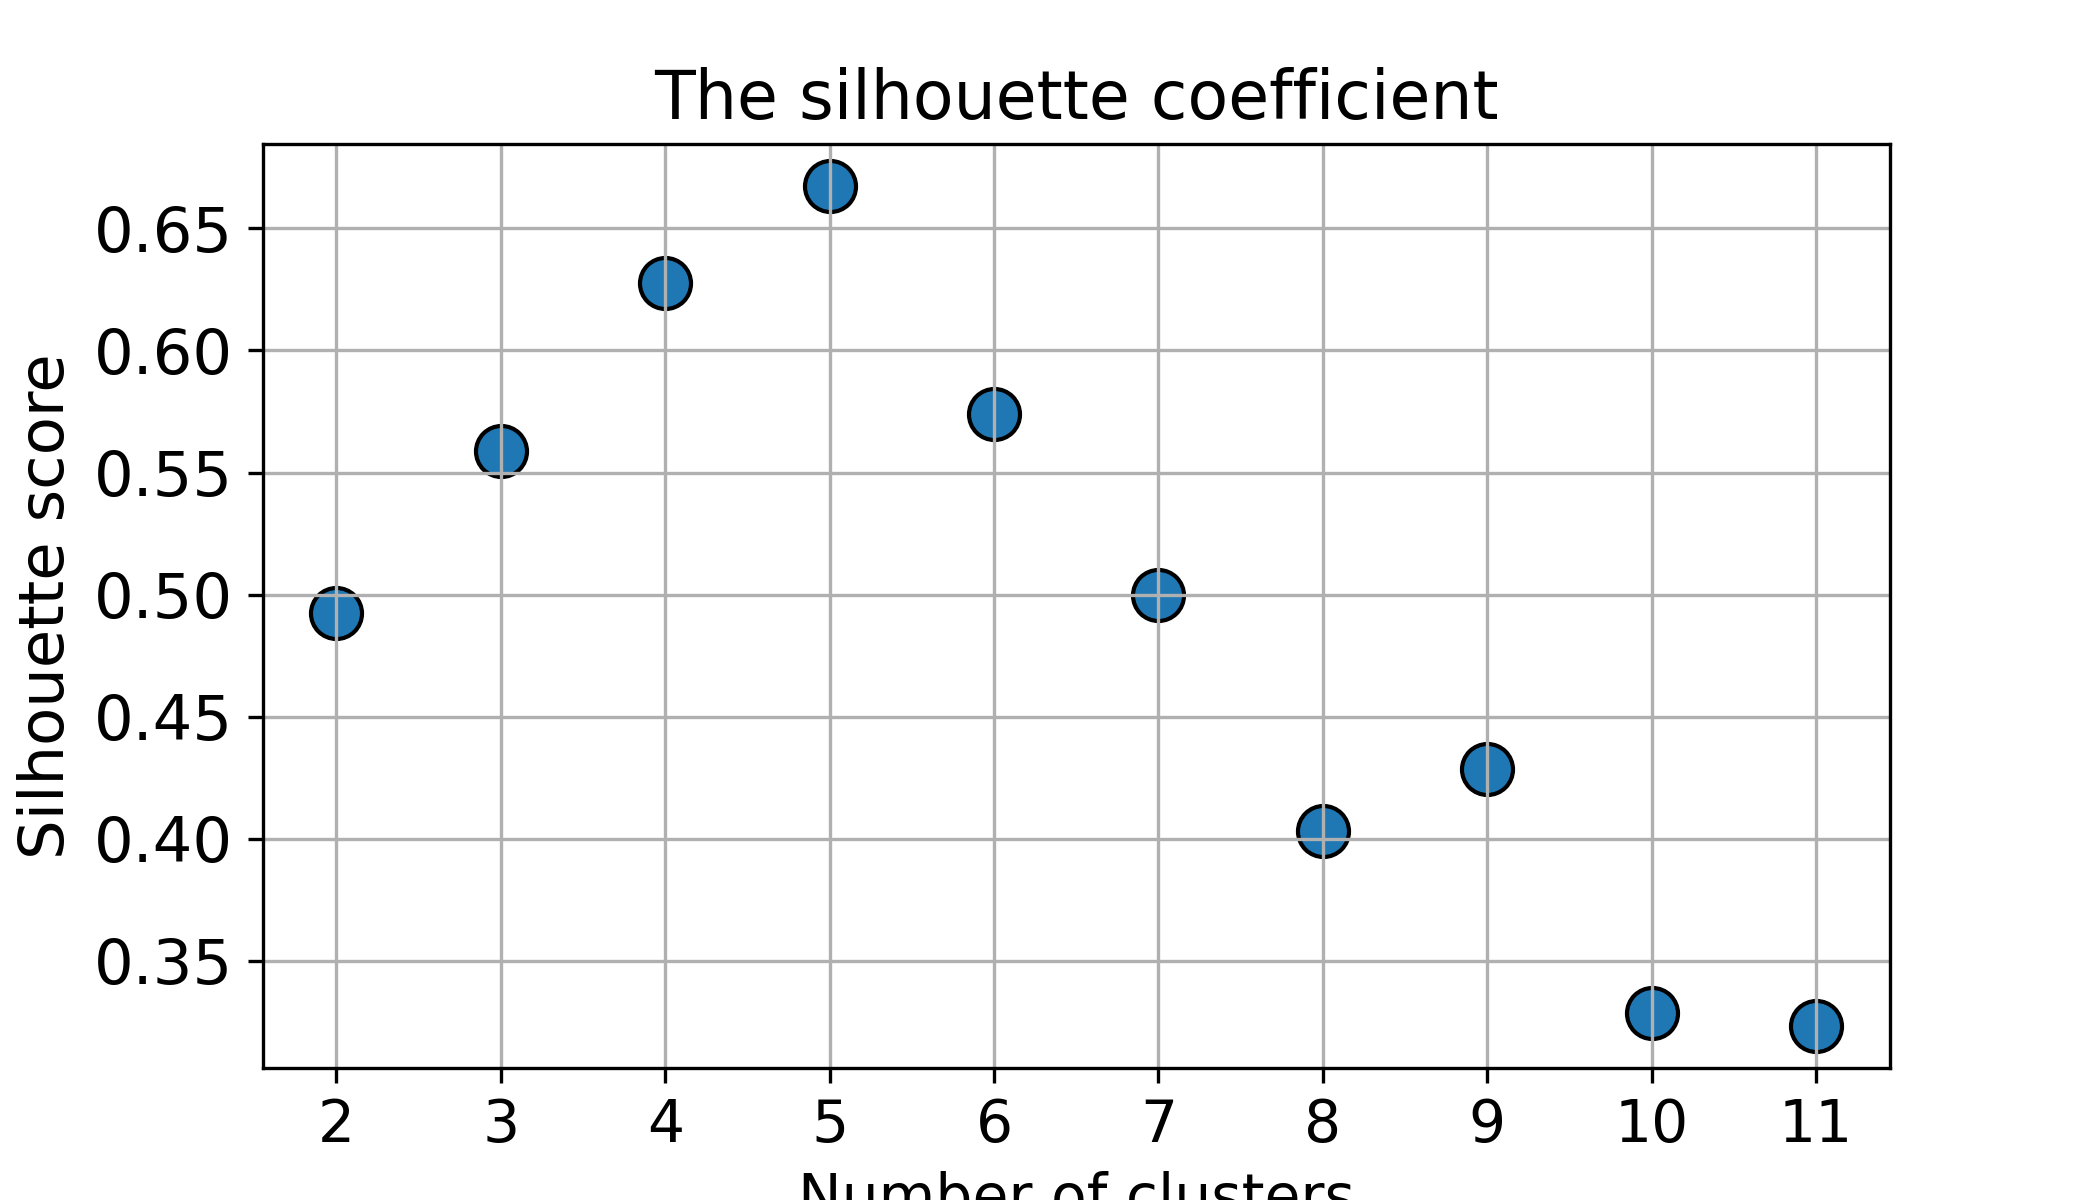

Как видим, среднее значения силуэта возрастает до k=5, а затем начинается уменьшается. В итоге мы получаем выраженное пиковое значение, которое и равно нашему изначально заданному количество кластеров.

Тот же результат мы можем проследить для индекса Дэвиса-Болдуина, только там мы получаем минимальное значение, которое является оптимальным количеством классов для нашей задачи.

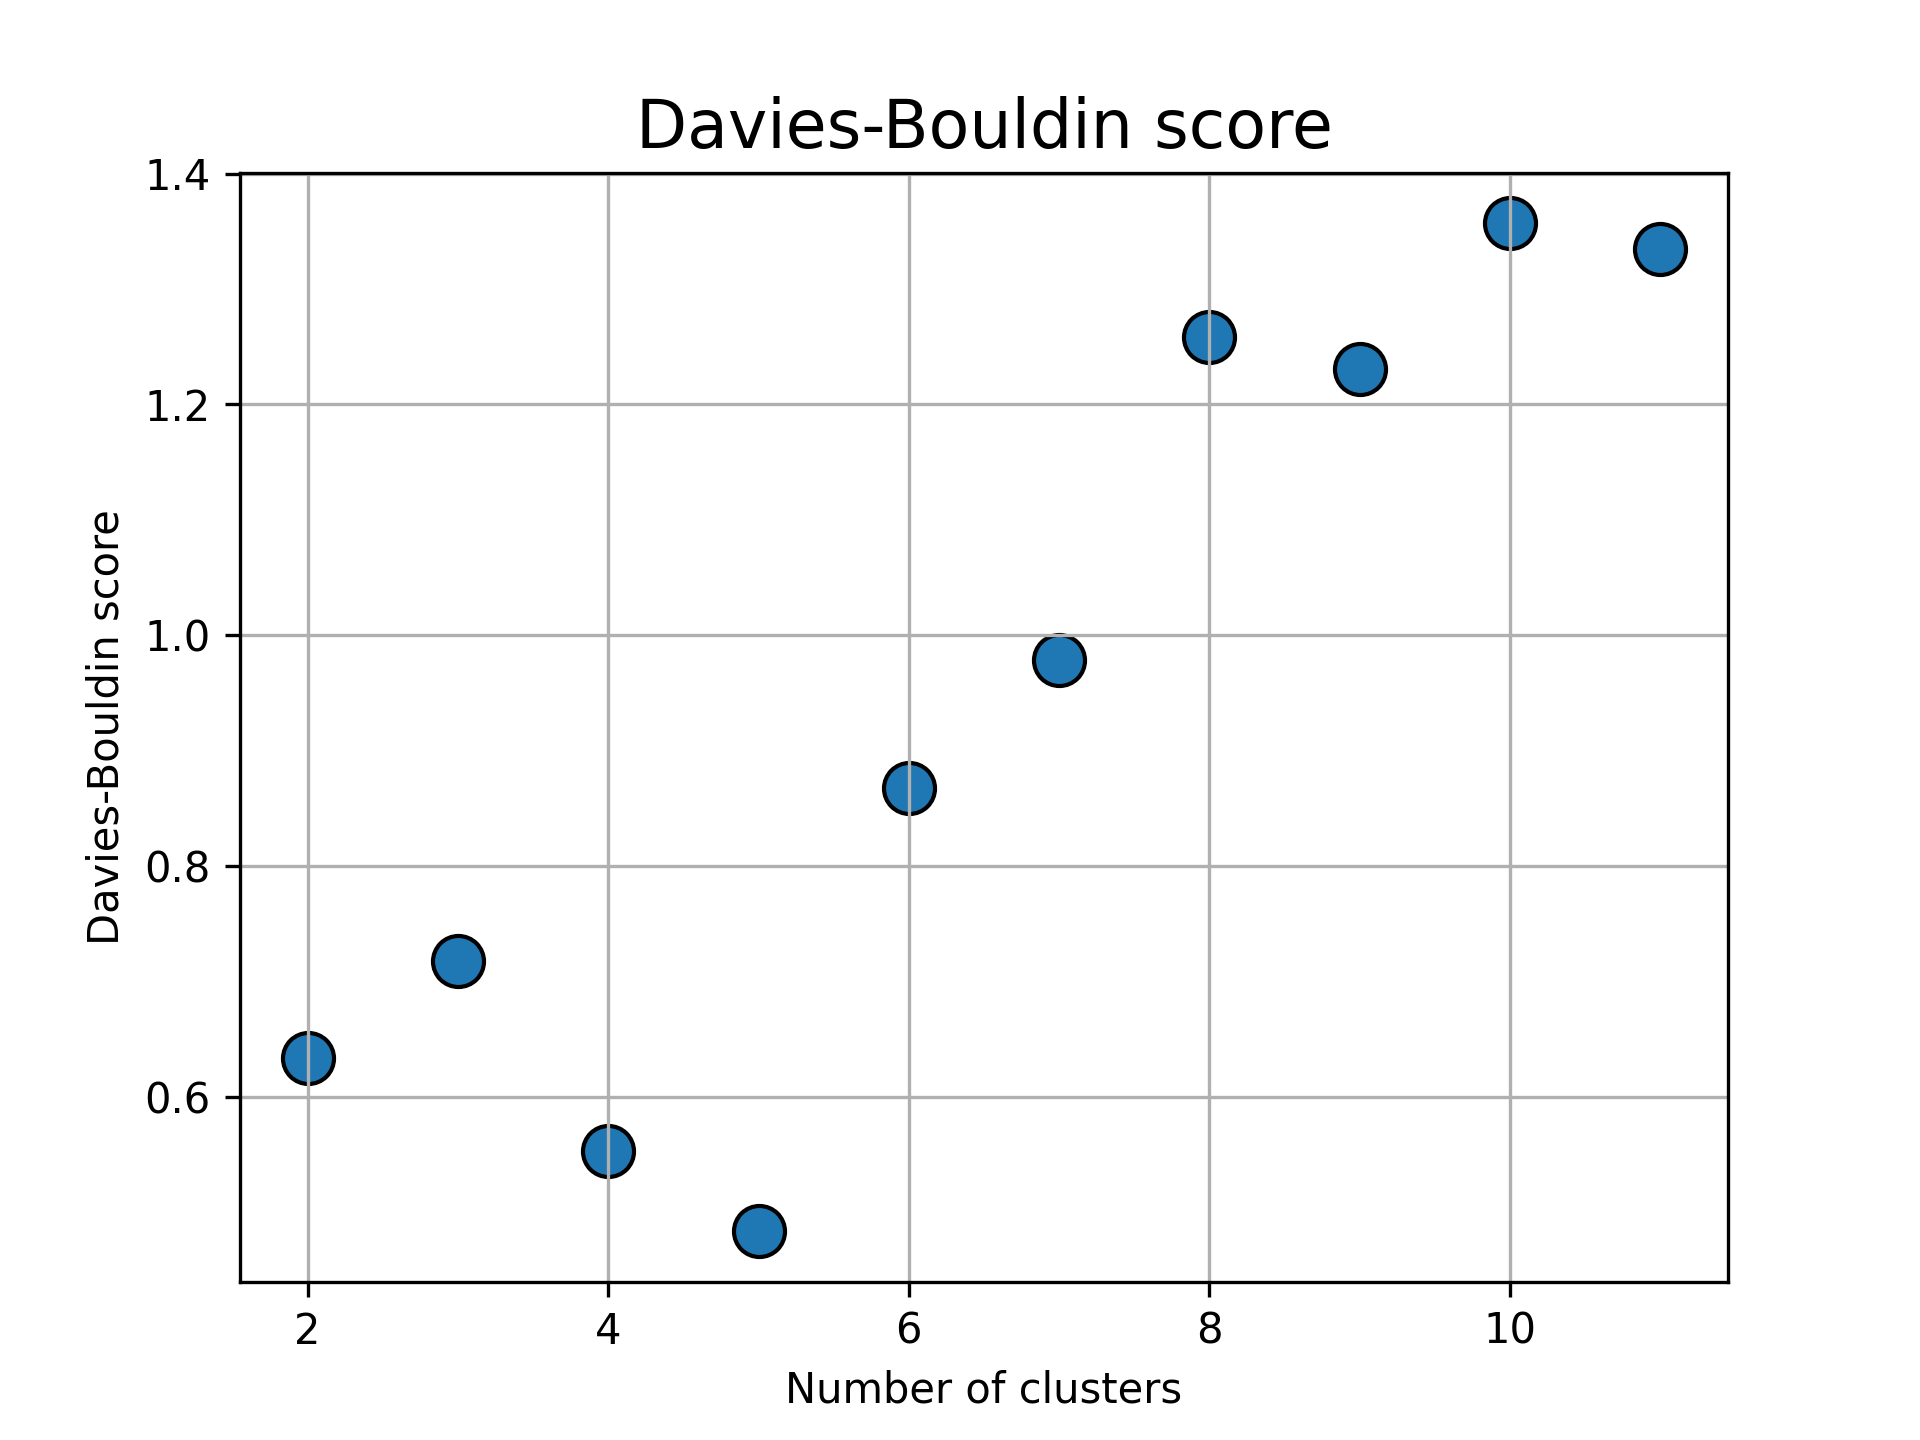

"Метод локтя" для визуального определения правильного количества кластеров при обучении без учителя с применением алгоритма k-means не всегда является лучшим способом, поскольку если в данных имеется большой шум, сам график для этого становится очень плавным, что усложняет принятие решения.

При решении подобных задач лучше ориентироваться на максимальное (если в качестве метрики выбрано значение силуэта) или минимальное (если выбран индекс Дэвида-Болдуина) значение других метрик и сооветствующее количество классов для кластеризации.
